# Основы анализа сложных сетей в NetworkX

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Библиотека по работе с сетями:

In [2]:
import networkx as nx 

In [3]:
G=nx.Graph() # создать пустой граф
G.add_node(1)  # добавить вершину
G.add_nodes_from([2,3,4,5]) # добавить список вершин
G.add_edge(1,2) # добавить ребро
G.add_edges_from([(1,2),(3,5),(1,3),(1,5),(4,5),(3,4),(2,1)]) # добавить список ребер

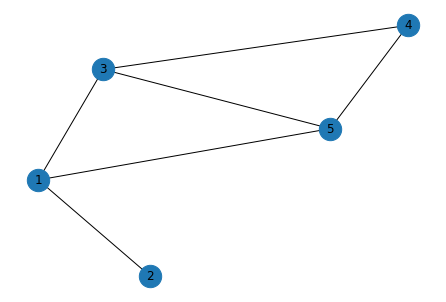

In [4]:
pos=nx.spring_layout(G,iterations=10) # координаты для визуализации графа
nx.draw(G,pos,node_size=500,with_labels=True)# отрисовка графа

In [5]:
A=nx.adjacency_matrix(G).todense() # матрица смежности
print(A) 

[[0 1 1 0 1]
 [1 0 0 0 0]
 [1 0 0 1 1]
 [0 0 1 0 1]
 [1 0 1 1 0]]


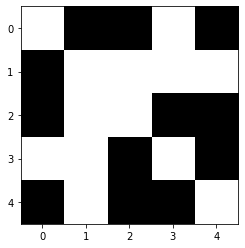

In [6]:
plt.imshow(A,cmap='binary') 

## Топология сложных сетей 

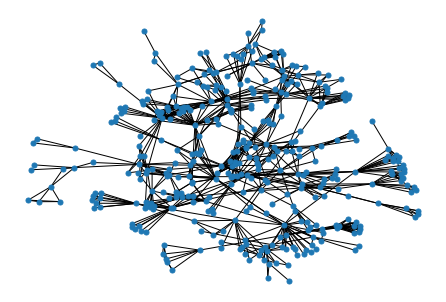

In [7]:
G=nx.read_edgelist('../data/raw/ca-netscience.txt', nodetype=int)
pos=nx.spring_layout(G,iterations=20)
nx.draw(G,pos,node_size=25,with_labels=False)

### Общее

In [8]:
print("Number of nodes: %d" % nx.number_of_nodes(G))
print("Number of edges: %d" % nx.number_of_edges(G))
print("density: %s" % nx.density(G))

Number of nodes: 379
Number of edges: 914
density: 0.012759838617358406


## [Степени связанности](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)

In [9]:
# G.degree() # степени всех вершин 
G.degree[4] #степень вершины 4

34

In [10]:
G.degree()

DegreeView({2: 2, 1: 10, 3: 2, 4: 34, 5: 27, 16: 21, 44: 4, 113: 15, 131: 12, 250: 6, 259: 3, 13: 9, 14: 4, 15: 16, 45: 10, 46: 8, 47: 8, 61: 4, 126: 6, 127: 6, 128: 8, 146: 3, 152: 1, 153: 3, 154: 3, 164: 4, 165: 4, 166: 4, 176: 8, 177: 8, 249: 3, 274: 2, 313: 5, 314: 5, 323: 4, 324: 4, 330: 4, 371: 2, 373: 4, 374: 3, 199: 7, 201: 14, 202: 7, 204: 6, 231: 14, 235: 2, 236: 10, 237: 4, 238: 4, 254: 2, 298: 4, 66: 6, 112: 3, 114: 6, 115: 5, 135: 9, 136: 2, 189: 3, 312: 2, 352: 6, 353: 6, 354: 6, 355: 6, 356: 6, 91: 8, 92: 8, 130: 6, 132: 7, 133: 6, 134: 6, 17: 9, 18: 8, 19: 3, 20: 2, 278: 2, 279: 2, 334: 8, 366: 4, 367: 4, 368: 4, 129: 3, 327: 3, 340: 2, 341: 2, 147: 2, 148: 2, 200: 3, 203: 3, 258: 5, 245: 6, 252: 2, 253: 2, 26: 27, 232: 5, 233: 5, 234: 3, 239: 7, 240: 7, 246: 7, 257: 5, 297: 2, 247: 3, 7: 6, 6: 2, 8: 12, 190: 4, 191: 2, 192: 3, 193: 3, 62: 4, 63: 3, 64: 3, 65: 10, 137: 4, 342: 3, 343: 3, 344: 1, 25: 3, 27: 3, 28: 3, 40: 9, 95: 17, 104: 5, 105: 4, 106: 9, 107: 8, 108: 7,

In [11]:
degrees=[d for node, d in G.degree()]
print(max(degrees))
print(min(degrees))
print(np.mean(degrees))

34
1
4.823218997361478


### Распределение по степеням связанности

Text(0, 0.5, '$\\rho(k)$')

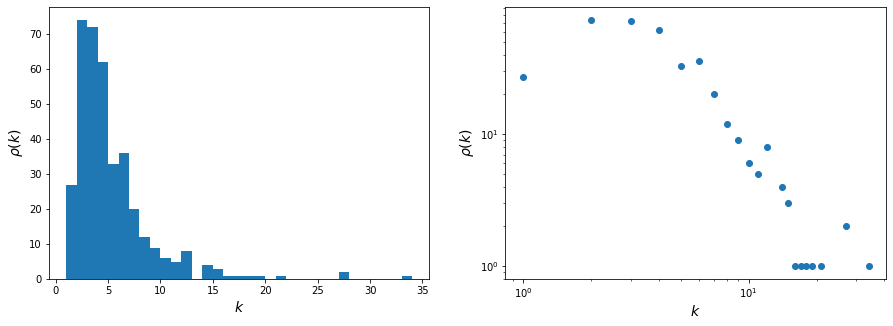

In [12]:
ro=np.bincount(degrees)
x=np.nonzero(ro)
y=ro[np.nonzero(ro)]

fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(15, 5))
ax[0].hist(degrees, bins=max(degrees)-min(degrees))
ax[0].set_xlabel(r'$ k$', fontsize=14)
ax[0].set_ylabel(r'$\rho(k)$', fontsize=14)

ax[1].scatter(x,y)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$ k$', fontsize=14)
ax[1].set_ylabel(r'$\rho(k)$', fontsize=14)

### [Кластеризация](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.clustering.html)

In [13]:
print(nx.transitivity(G)) # глобальный коэффициент кластеризации
print(nx.nx.average_clustering(G)) # локальная кластеризация
print(nx.clustering(G,[1,2,3,4,5])) # коэффициенты кластеризации заданных вершин
print(nx.triangles(G,[1,2,3,4,5])) # число треугольников 

0.4305750350631136
0.7412306142925664
{1: 0.26666666666666666, 2: 1.0, 3: 1.0, 4: 0.13368983957219252, 5: 0.18233618233618235}
{1: 12, 2: 1, 3: 1, 4: 75, 5: 64}


### [Paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)

In [14]:
nx.has_path(G,1,15)

True

In [15]:
nx.shortest_path(G,1,15)

[1, 4, 15]

In [16]:
nx.shortest_path_length(G,1,15)

2

In [17]:
print("diameter: %d" % nx.diameter(G))
print("Average shortest path: %s" % nx.average_shortest_path_length(G))

diameter: 17
Average shortest path: 6.041867347935949


### [Метрики центральности](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html)

In [18]:
Gk = nx.karate_club_graph()

dg=[d for node, d in Gk.degree()]

pos=nx.spring_layout(Gk,iterations=10)

def draw_(G,pos, metrics):
    norm=1000/np.max(metrics)
    options = {
    'with_labels':True,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'line_color': 'grey',
    'linewidths': 0.5,
    'width': 0.5,
    'cmap': 'YlGnBu'
    }
    nx.draw(G, pos, **options)

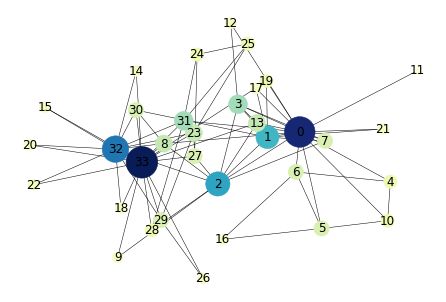

In [19]:
draw_(Gk,pos,dg)

In [20]:
d_centr=list(nx.degree_centrality(Gk).values()) # центральность по степени
cl_centr=list(nx.closeness_centrality(Gk).values()) # центральность по близости
b_centr=list(nx.betweenness_centrality(Gk).values()) # центральность по посредничеству
pg_rank=list(nx.pagerank(Gk, alpha=0.85).values()) # значения page rank 

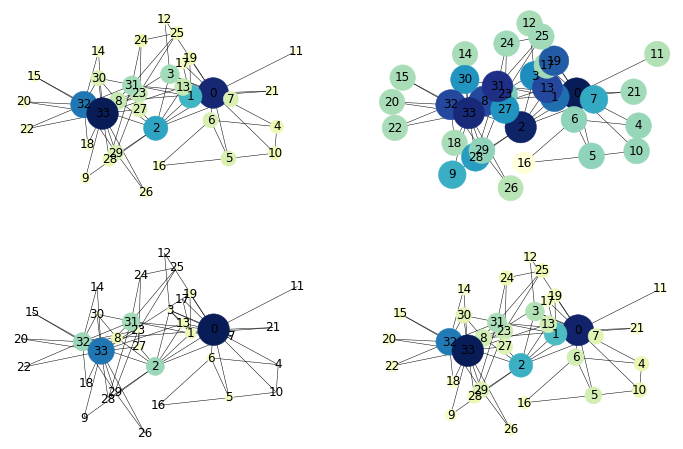

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))
plt.subplot(221)
draw_(Gk,pos, d_centr)

plt.subplot(222)
draw_(Gk,pos, cl_centr)
plt.subplot(223)
draw_(Gk,pos, b_centr)
plt.subplot(224)
draw_(Gk,pos, pg_rank)

## Моделирование сложных сетей 

### 1. [Модель Эрдеша-Реньи](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) 

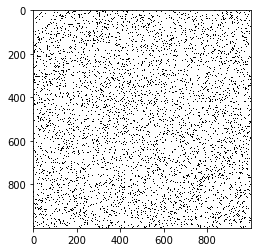

In [22]:
ER=nx.erdos_renyi_graph(1000,0.1) # случайный граф Эрдеша-Реньи
A=nx.adjacency_matrix(ER).todense()
plt.imshow(A,cmap='binary')

### 2. [Модель Барабаши-Альберта](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model) 

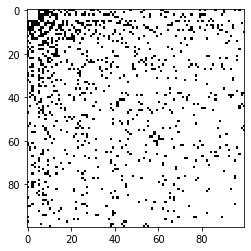

In [23]:
BA=nx.barabasi_albert_graph(100, 5) 
A=nx.adjacency_matrix(BA).todense()
plt.imshow(A,cmap='binary')

### Рандомизация сети 

In [24]:
import random
def randomization(G0,steps):
    G=G0.copy()
    L=list(G.edges())
    edges=G.number_of_edges()-1
    st=0
    while(st<steps):
        e1,e2=random.randint(0, edges),random.randint(0, edges)     
        (P,Q)=L[e1]
        (R,S)=L[e2]
        if ((P!=R) and (Q!=S) and(not G.has_edge(P,R)) and(not G.has_edge(Q,S))):
            G.remove_edge(R,S)
            G.remove_edge(P,Q)
            G.add_edge(P,R)
            G.add_edge(Q,S)
            L[e1]=(P,R)
            L[e2]=(Q,S)
            st=st+1
    return(G)

In [25]:
G_rand=randomization(G,10000)
print(nx.transitivity(G),nx.transitivity(G_rand)) 
print(nx.nx.average_clustering(G),nx.nx.average_clustering(G_rand)) 

0.4305750350631136 0.03225806451612903
0.7412306142925664 0.03408109235547418


#### больше про свойства и модели в [книге](http://networksciencebook.com/)